In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from scipy.stats import f_oneway, zscore
# Load the dataset
# uploaded csv file locally through google colab
file_path = '/content/Dataset 791.csv'
data = pd.read_csv(file_path)
# Displaying the first few rows of the dataset to understand its structure
data.head()
# Checking for missing values in the dataset

,Nickname,Defender Score,Attacker Score,Time (sec),Winner,Level
0,u20444550,8,5,138,Defender,Expert
1,u20444550,8,5,137,Defender,Expert
2,u20444550,10,3,118,Defender,Expert
3,u20444550,8,5,112,Defender,Expert
4,u20444550,9,4,107,Defender,Expert


In [ ]:
missing_values = data.isnull().sum()
# Displaying the summary of missing values
missing_values

,0
Nickname,0
Defender Score,0
Attacker Score,0
Time (sec),0
Winner,0
Level,0


Skewness: Defender Score    0.092683
Attacker Score   -0.080193
Time (sec)        5.293756
dtype: float64


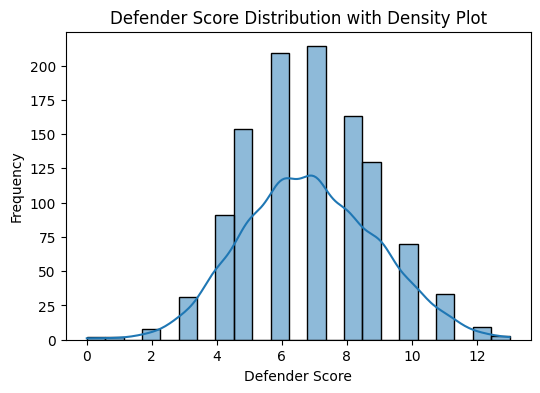

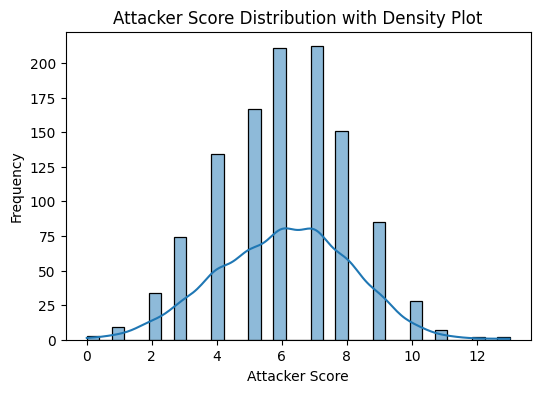

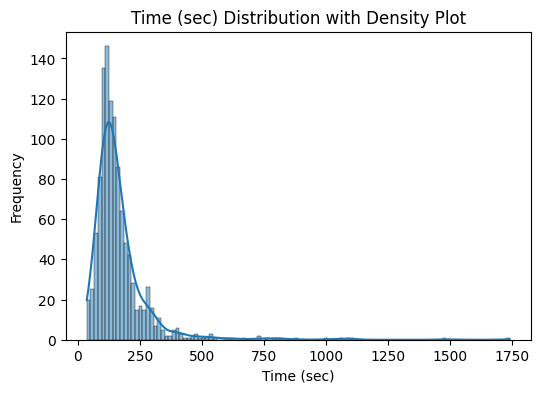

In [ ]:
# Checking skewness for numerical columns
skewness = data[['Defender Score', 'Attacker Score', 'Time (sec)']].skew()
print("Skewness:", skewness)
# Visualizing skewness with histograms and density plots for numerical columns
# Plot histogram and density plot for "Defender Score"
plt.figure(figsize=(6,4))
sns.histplot(data['Defender Score'], kde=True)
plt.title('Defender Score Distribution with Density Plot')
plt.xlabel('Defender Score')
plt.ylabel('Frequency')
plt.show()
# Plot histogram and density plot for "Attacker Score"
plt.figure(figsize=(6,4))
sns.histplot(data['Attacker Score'], kde=True)
plt.title('Attacker Score Distribution with Density Plot')
plt.xlabel('Attacker Score')
plt.ylabel('Frequency')
plt.show()
# Plot histogram and density plot for "Time (sec)"
plt.figure(figsize=(6,4))
sns.histplot(data['Time (sec)'], kde=True)
plt.title('Time (sec) Distribution with Density Plot')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.show()

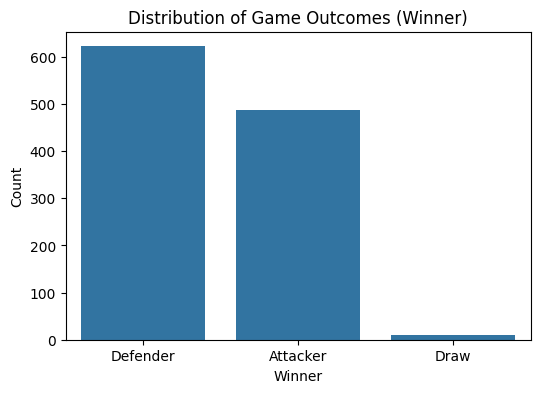

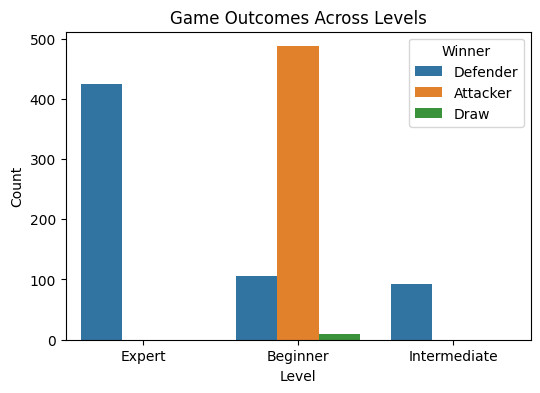

,Defender Score,Attacker Score,Time (sec)
count,1119.000000,1119.000000,1119.000000
mean,6.864164,6.076854,168.133155
std,2.042341,2.031371,125.961246
min,0.000000,0.000000,37.000000
25%,5.000000,5.000000,108.000000
50%,7.000000,6.000000,139.000000
75%,8.000000,7.000000,186.000000
max,13.000000,13.000000,1738.000000


In [ ]:
# Summary statistics for numerical columns
summary_stats = data.describe()
# Plotting distribution of the 'Winner' column to understand game outcomes
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Winner')
plt.title('Distribution of Game Outcomes (Winner)')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()
# Plotting distribution of 'Level' across game outcomes
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Level', hue='Winner')
plt.title('Game Outcomes Across Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()
# Display the summary statistics of numerical features
summary_stats

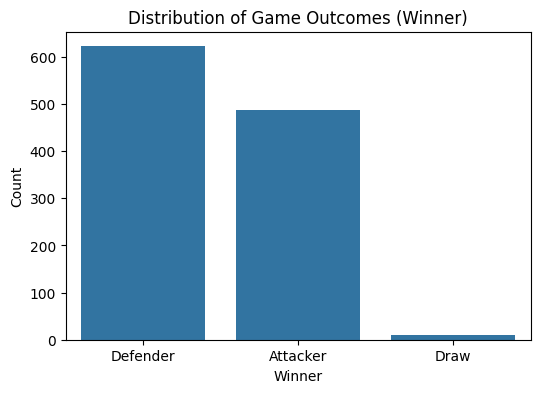

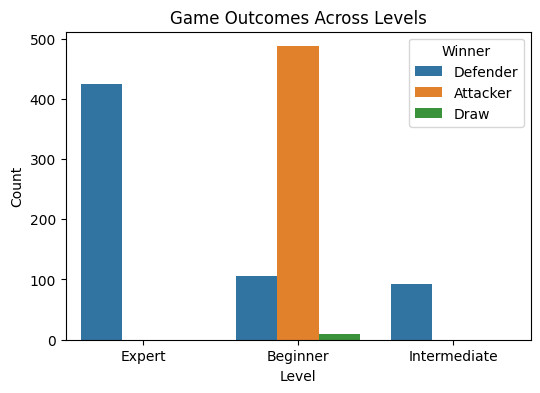

In [ ]:
# Data Preprocessing: Encoding categorical variables (Winner and Level)
label_encoder = LabelEncoder()
data['Winner_Encoded'] = label_encoder.fit_transform(data['Winner']) # 0 for Attacker, 1 for Def
data['Level_Encoded'] = label_encoder.fit_transform(data['Level'])
# Exploratory Data Analysis (EDA)
# Distribution of Game Outcomes (Winner)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Winner')
plt.title('Distribution of Game Outcomes (Winner)')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()
# Distribution of Level vs Game Outcomes
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Level', hue='Winner')
plt.title('Game Outcomes Across Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

In [ ]:
# Statistical analysis - Summary statistics
summary_stats = data.describe()
print(summary_stats)

       Defender Score  Attacker Score   Time (sec)  Winner_Encoded  \
count     1119.000000     1119.000000  1119.000000     1119.000000   
mean         6.864164        6.076854   168.133155        0.573727   
std          2.042341        2.031371   125.961246        0.512516   
min          0.000000        0.000000    37.000000        0.000000   
25%          5.000000        5.000000   108.000000        0.000000   
50%          7.000000        6.000000   139.000000        1.000000   
75%          8.000000        7.000000   186.000000        1.000000   
max         13.000000       13.000000  1738.000000        2.000000   

       Level_Encoded  
count    1119.000000  
mean        0.543342  
std         0.642591  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         2.000000  


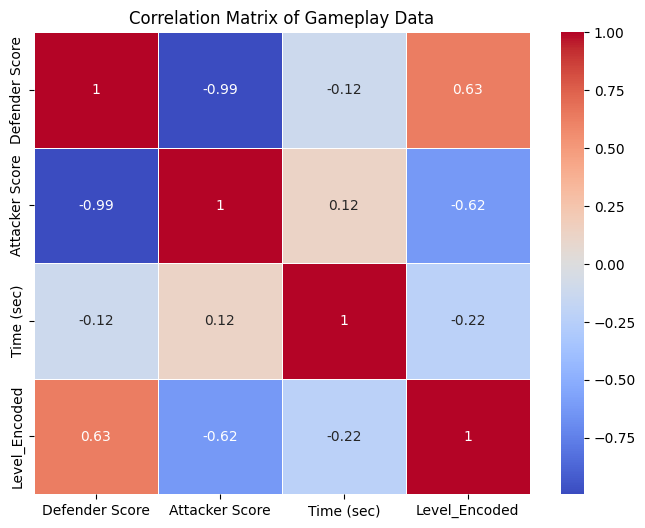

In [ ]:
# Correlation Matrix
correlation_matrix = data[['Defender Score', 'Attacker Score', 'Time (sec)', 'Level_Encoded']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Gameplay Data')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


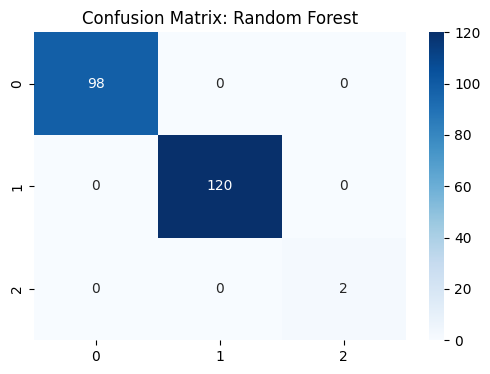

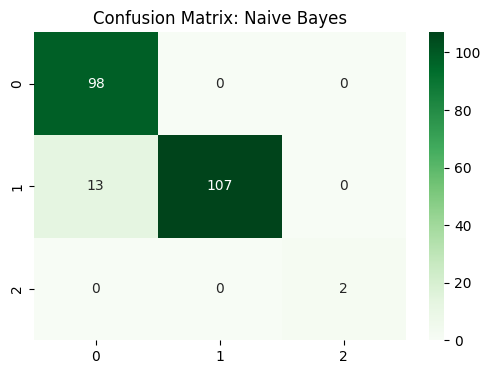

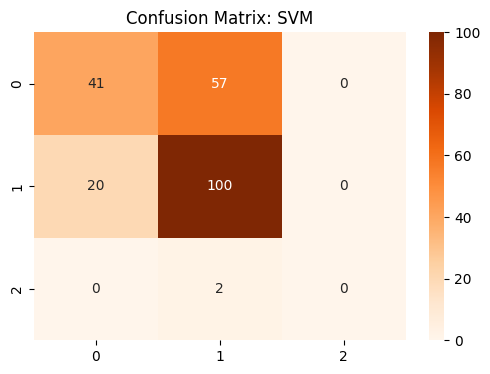

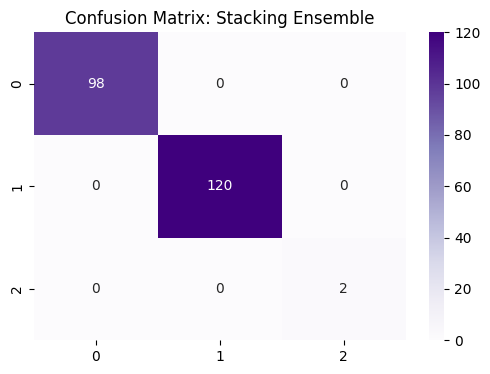

In [ ]:
# Data filtering Removing outliers using Z-scores for Defender Score, Attacker Score, and Time
data['Defender_Score_Z'] = zscore(data['Defender Score'])
data['Attacker_Score_Z'] = zscore(data['Attacker Score'])
data['Time_Z'] = zscore(data['Time (sec)'])


# Filtering out outliers with Z-scores greater than 3
filtered_data = data[(data['Defender_Score_Z'].abs() <= 3) &
                  (data['Attacker_Score_Z'].abs() <= 3) &
                  (data['Time_Z'].abs() <= 3)]


# Splitting the dataset into features (X) and target (y)
X = filtered_data[['Defender Score', 'Attacker Score', 'Time (sec)', 'Level_Encoded']]
y = filtered_data['Winner_Encoded']


# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize models: Random Forest, Naive Bayes, and SVM
rf_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()
svm_model = SVC(random_state=42)


# Train the models
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


# Predictions
rf_preds = rf_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)


# Evaluation function for multiclass classification using macro average
def evaluate_model_multiclass(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  return accuracy, precision, recall


# Evaluate the models
rf_metrics = evaluate_model_multiclass(y_test, rf_preds)
nb_metrics = evaluate_model_multiclass(y_test, nb_preds)
svm_metrics = evaluate_model_multiclass(y_test, svm_preds)
# Confusion Matrices
rf_conf_matrix = confusion_matrix(y_test, rf_preds)
nb_conf_matrix = confusion_matrix(y_test, nb_preds)
svm_conf_matrix = confusion_matrix(y_test, svm_preds)


# Display Confusion Matrices
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Random Forest')
plt.show()


plt.figure(figsize=(6, 4))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Naive Bayes')
plt.show()


plt.figure(figsize=(6, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix: SVM')
plt.show()
# Stacking ensemble model with RandomForest as the final estimator
base_models = [('rf', rf_model), ('nb', nb_model), ('svm', svm_model)]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42))
stacking_model.fit(X_train, y_train)
stacking_preds = stacking_model.predict(X_test)


# Evaluate the stacking model
stacking_metrics = evaluate_model_multiclass(y_test, stacking_preds)
stacking_conf_matrix = confusion_matrix(y_test, stacking_preds)


# Displaying stacking confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(stacking_conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix: Stacking Ensemble')
plt.show()

In [ ]:
# Display the metrics
model_performance = pd.DataFrame({
  'Model': ['Random Forest', 'Naive Bayes', 'SVM', 'Stacking Ensemble'],
  'Accuracy': [rf_metrics[0], nb_metrics[0], svm_metrics[0], stacking_metrics[0]],
  'Precision': [rf_metrics[1], nb_metrics[1], svm_metrics[1], stacking_metrics[1]],
  'Recall': [rf_metrics[2], nb_metrics[2], svm_metrics[2], stacking_metrics[2]]
})


print(model_performance)

               Model  Accuracy  Precision    Recall
0      Random Forest  1.000000   1.000000  1.000000
1        Naive Bayes  0.940909   0.960961  0.963889
2                SVM  0.640909   0.433687  0.417234
3  Stacking Ensemble  1.000000   1.000000  1.000000


In [ ]:
# ANOVA Analysis
# Performing ANOVA for Defender Score across different Levels
anova_defender_score_level = f_oneway(
  data[data['Level'] == 'Beginner']['Defender Score'],
  data[data['Level'] == 'Intermediate']['Defender Score'],
  data[data['Level'] == 'Expert']['Defender Score']
)


# Performing ANOVA for Attacker Score across different Levels
anova_attacker_score_level = f_oneway(
  data[data['Level'] == 'Beginner']['Attacker Score'],
  data[data['Level'] == 'Intermediate']['Attacker Score'],
  data[data['Level'] == 'Expert']['Attacker Score']
)


# Performing ANOVA for Game Time across different Winners (Attacker vs Defender)
anova_game_time_winner = f_oneway(
  data[data['Winner'] == 'Attacker']['Time (sec)'],
  data[data['Winner'] == 'Defender']['Time (sec)']
)


# Print ANOVA results
print("\nANOVA for Defender Score across Levels:")
print(f"F-statistic: {anova_defender_score_level.statistic}, p-value: {anova_defender_score_level.pvalue}")


print("\nANOVA for Attacker Score across Levels:")
print(f"F-statistic: {anova_attacker_score_level.statistic}, p-value: {anova_attacker_score_level.pvalue}")


print("\nANOVA for Game Time across Winners (Attacker vs Defender):")
print(f"F-statistic: {anova_game_time_winner.statistic}, p-value: {anova_game_time_winner.pvalue}")


ANOVA for Defender Score across Levels:
F-statistic: 592.8169058327384, p-value: 3.8054401385671644e-176

ANOVA for Attacker Score across Levels:
F-statistic: 581.8961579321079, p-value: 7.781284050043323e-174

ANOVA for Game Time across Winners (Attacker vs Defender):
F-statistic: 6.219590382056352, p-value: 0.012779478129331955
